## Import Data

In [1]:
# Import pandas and plotting packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# import modules for linear regression
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 

In [2]:
# Read in the data and print out the .head()
LoanDF = pd.read_csv("loan_data.csv")
LoanDF.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [3]:
LoanDF.shape

(252000, 13)

In [4]:
LoanDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [5]:
LoanDF.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


[]

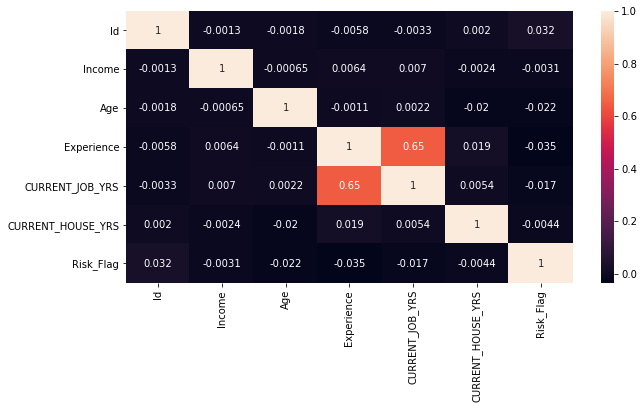

In [6]:
#View correlation matrix
plt.figure(figsize=(10,5))
sns.heatmap(LoanDF.corr(), annot=True)
plt.plot()

#### After viewing the correlation matrix, we identified that experience and current job years have multi-collinearity issues. Therefore, we decided to get rid of current job years because it has a weaker correlation with the risk flag. It is closer to zero. 

## Data Cleaning

In [7]:
#Check for null values
LoanDF.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [8]:
#Drop columns
NewLoanDF = LoanDF.drop(columns = ['CITY', 'STATE', 'Profession', 'CURRENT_HOUSE_YRS','CURRENT_JOB_YRS', 'Id'])
NewLoanDF.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Risk_Flag
0,1303834,23,3,single,rented,no,0
1,7574516,40,10,single,rented,no,0
2,3991815,66,4,married,rented,no,0
3,6256451,41,2,single,rented,yes,1
4,5768871,47,11,single,rented,no,1


In [9]:
#Check unique values within candidate predictor categorical variables 
NewLoanDF['Married/Single'].unique()

array(['single', 'married'], dtype=object)

In [10]:
NewLoanDF['Car_Ownership'].unique()

array(['no', 'yes'], dtype=object)

In [11]:
NewLoanDF['House_Ownership'].unique()

array(['rented', 'norent_noown', 'owned'], dtype=object)

In [12]:
NewLoanDF['Risk_Flag'].unique()

array([0, 1], dtype=int64)

In [13]:
#Change column headings to consistent format
NewLoanDF = NewLoanDF.rename({'House_Ownership':'Home Ownership', 'Car_Ownership':'Car Ownership', 'Risk_Flag':'Risk Flag'}, axis='columns')

In [14]:
#Check to see if columns were renamed
NewLoanDF.head()

,Income,Age,Experience,Married/Single,Home Ownership,Car Ownership,Risk Flag
0,1303834,23,3,single,rented,no,0
1,7574516,40,10,single,rented,no,0
2,3991815,66,4,married,rented,no,0
3,6256451,41,2,single,rented,yes,1
4,5768871,47,11,single,rented,no,1


In [15]:
#Change Married/Single variable to categorical 
#Think about Home Ownership and 
features = ["Income", "Age", "Experience", "Married/Single", "Home Ownership", "Car Ownership", "Risk Flag"]
NewLoanDF = pd.get_dummies(NewLoanDF[features])
print(NewLoanDF)

         Income  Age  Experience  Risk Flag  Married/Single_married  \
0       1303834   23           3          0                       0   
1       7574516   40          10          0                       0   
2       3991815   66           4          0                       1   
3       6256451   41           2          1                       0   
4       5768871   47          11          1                       0   
...         ...  ...         ...        ...                     ...   
251995  8154883   43          13          0                       0   
251996  2843572   26          10          0                       0   
251997  4522448   46           7          0                       0   
251998  6507128   45           0          0                       0   
251999  9070230   70          17          0                       0   

        Married/Single_single  Home Ownership_norent_noown  \
0                           1                            0   
1                      

In [16]:
#Drop redundant columns
NewLoanDF = NewLoanDF.drop(columns = ['Married/Single_single', 'Car Ownership_no', 'Home Ownership_norent_noown', 'Home Ownership_rented'])
NewLoanDF.head()

,Income,Age,Experience,Risk Flag,Married/Single_married,Home Ownership_owned,Car Ownership_yes
0,1303834,23,3,0,0,0,0
1,7574516,40,10,0,0,0,0
2,3991815,66,4,0,1,0,0
3,6256451,41,2,1,0,0,1
4,5768871,47,11,1,0,0,0


In [17]:
#Rename new married and single columns with dummies. Married/Single column: 1=married and 0=single  
#car Ownership: 1 = yes, owns car / 0 = doesn't own car
#Home ownership: 1= yes, owns home and 0 = no own
NewLoanDF = NewLoanDF.rename({'Married/Single_married':'Married/Single', 'Car Ownership_yes':'Car Ownership', 'Home Ownership_owned':'Home Ownership' }, axis='columns')

In [18]:
#Check new column headings
NewLoanDF.head()

,Income,Age,Experience,Risk Flag,Married/Single,Home Ownership,Car Ownership
0,1303834,23,3,0,0,0,0
1,7574516,40,10,0,0,0,0
2,3991815,66,4,0,1,0,0
3,6256451,41,2,1,0,0,1
4,5768871,47,11,1,0,0,0


<AxesSubplot:>

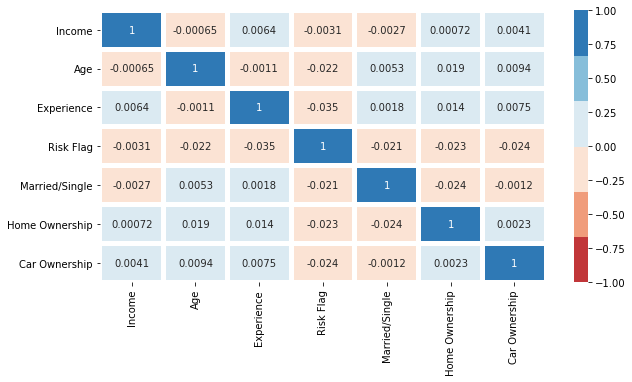

In [29]:
#Check correlation 

plt.figure(figsize=(10,5))
sns.heatmap(NewLoanDF.corr(), vmin=-1, vmax=1, linewidth = 4, annot=True, cmap=sns.color_palette("RdBu") )

In [20]:
#Save clean data to new csv file
NewLoanDF.to_csv('NewLoanData.csv',index=False)

## Data Exploration

<AxesSubplot:>

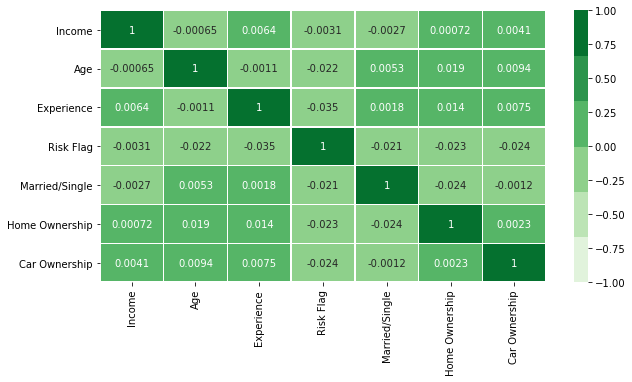

In [30]:
#Check correlation 
plt.figure(figsize=(10,5))
sns.heatmap(NewLoanDF.corr(), vmin = -1, vmax = 1, linewidth = 0.5, annot=True, cmap=sns.color_palette("Greens"))

In [22]:
#View pairplots
#sns.pairplot(NewLoanDF)

In [23]:
NewLoanDF.describe()

,Income,Age,Experience,Risk Flag,Married/Single,Home Ownership,Car Ownership
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,0.123000,0.102095,0.051262,0.301587
std,2.878311e+06,17.063855,6.002590,0.328438,0.302774,0.220532,0.458948
min,1.031000e+04,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,0.000000,0.000000,0.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,0.000000,0.000000,0.000000,1.000000
max,9.999938e+06,79.000000,20.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='Income'>

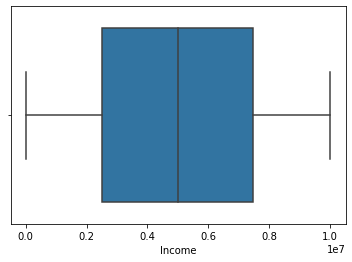

In [24]:
sns.boxplot(x=NewLoanDF.Income)

<AxesSubplot:xlabel='Age'>

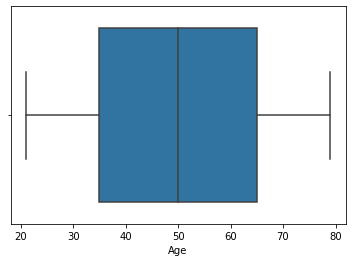

In [25]:
sns.boxplot(x=NewLoanDF.Age)

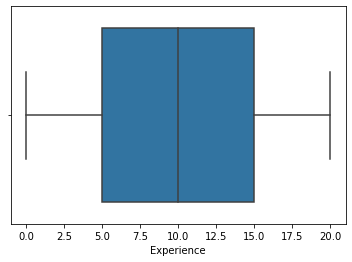

In [26]:
sns.boxplot(x=NewLoanDF.Experience);

In [27]:
NewLoanDF['Risk Flag'].value_counts()

0    221004
1     30996
Name: Risk Flag, dtype: int64

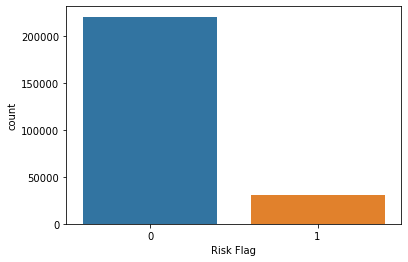

In [28]:
sns.countplot(x='Risk Flag', data=NewLoanDF);
